<a href="https://colab.research.google.com/github/shazam-25/netflix_stock_price/blob/feature/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import sys
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Extract Data

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Import Data extraction module from Drive
sys.path.append('/content/drive/MyDrive/Projects/netflix_stock_price')
import data_extraction as de

Mounted at /content/drive


In [3]:
# Call function to extract data from Kaggle
df = de.extract_data()

Path to dataset files: /kaggle/input/netflix-stock-price-history
Contents of directory: ['/kaggle/input/netflix-stock-price-history/Netflix_stock_data.csv']


Raw Data Understanding

In [4]:
# Sample records
print(f'Top 5 records:\n{df.head()}')
print(f'\nBottom 5 records:\n{df.tail()}')

Top 5 records:
         Date     Close      High       Low      Open     Volume
0  2002-05-23  1.196429  1.242857  1.145714  1.156429  104790000
1  2002-05-24  1.210000  1.225000  1.197143  1.214286   11104800
2  2002-05-28  1.157143  1.232143  1.157143  1.213571    6609400
3  2002-05-29  1.103571  1.164286  1.085714  1.164286    6757800
4  2002-05-30  1.071429  1.107857  1.071429  1.107857   10154200

Bottom 5 records:
            Date        Close         High          Low         Open   Volume
5812  2025-06-30  1339.130005  1341.150024  1321.209961  1331.000000  3282900
5813  2025-07-01  1293.599976  1338.770020  1282.219971  1338.229980  4993600
5814  2025-07-02  1284.859985  1299.949951  1271.589966  1296.959961  3048800
5815  2025-07-03  1297.180054  1302.260010  1279.760010  1292.000000  2006200
5816  2025-07-07  1289.619995  1295.000000  1276.020020  1295.000000  2271400


In [5]:
# Size of the data
print(f'Shape: {df.shape}')

# Data types of the features
print(f'\nFeature Types:\n{df.dtypes}')

# Check duplicate records
print(f'\nDuplicate records: {df.duplicated().sum()}')

# Check null records
print(f'\nNull records:\n{df.isnull().sum()}')

Shape: (5817, 6)

Feature Types:
Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

Duplicate records: 0

Null records:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


Basic Feature Modification

In [6]:
# Convert 'Date' into date type
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Feature data type after conversion
print(f'Feature Data type after conversion:\n{df.dtypes}')

Feature Data type after conversion:
Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object


Exploratory Data Analysis



1.   Univariant Analysis
2.   Bivariant Analysis
3.   Multi-variant Analysis





Univariant Analysis
* Descriptive Statistical Analysis
* Outlier detection
* Feature Distribution

In [7]:
# Statistical description of the features
print(f'\nStatistical Analysis:\n{df.describe(include=np.number)}')


Statistical Analysis:
             Close         High          Low         Open        Volume
count  5817.000000  5817.000000  5817.000000  5817.000000  5.817000e+03
mean    175.637726   178.150233   172.948879   175.546123  1.512170e+07
std     241.103794   244.167788   237.718590   240.881717  1.835934e+07
min       0.372857     0.410714     0.346429     0.377857  2.856000e+05
25%       4.311429     4.408571     4.228571     4.318571  5.372800e+06
50%      47.448570    48.255714    46.557144    47.461430  9.346400e+06
75%     320.339996   325.790009   314.510010   320.390015  1.801990e+07
max    1339.130005  1341.150024  1321.209961  1338.229980  3.234140e+08


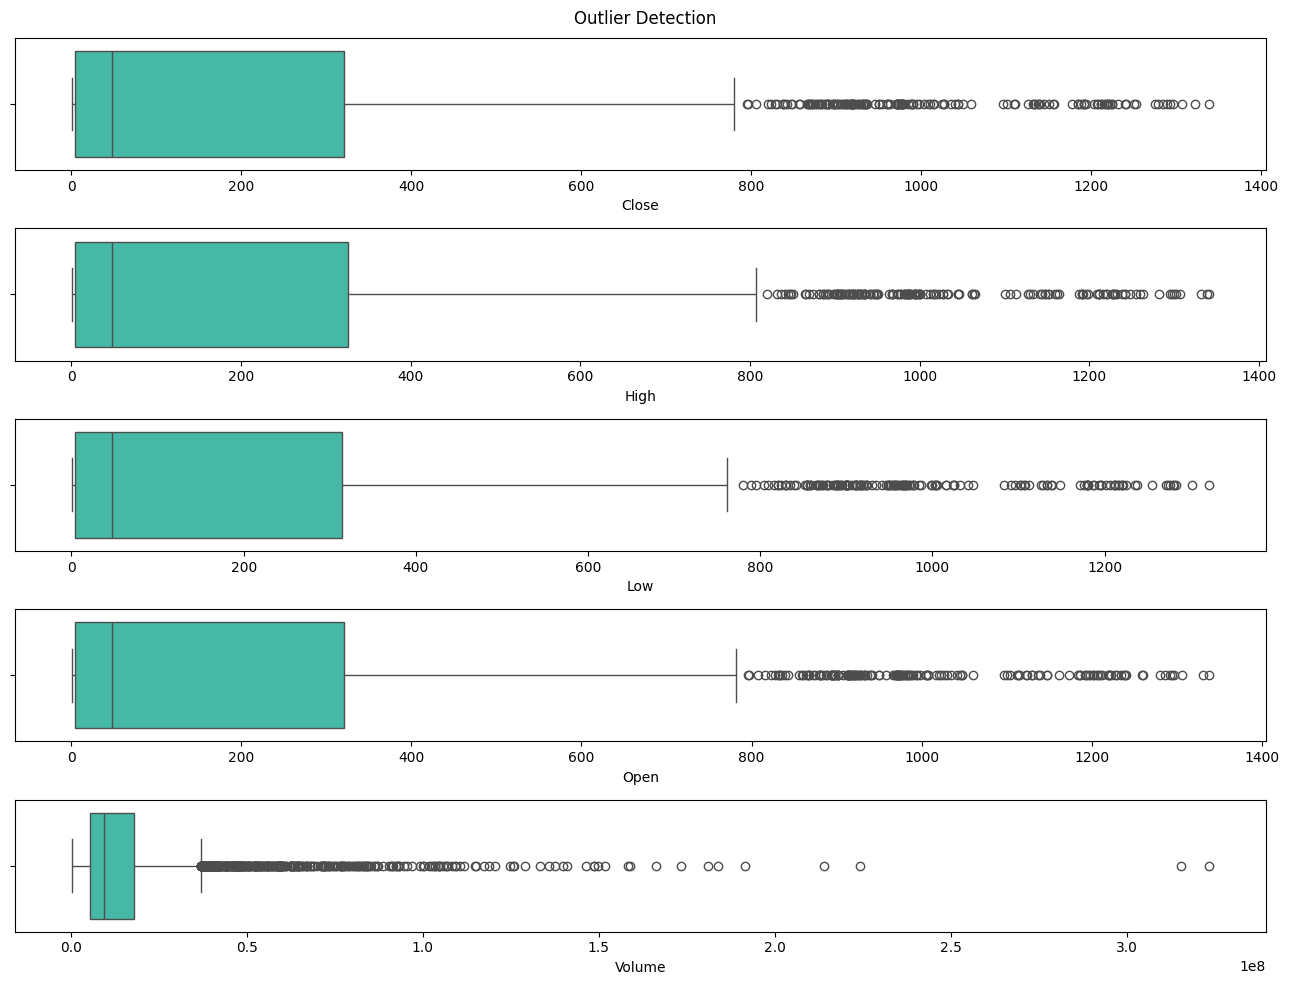

In [82]:
# Outlier Detection using Boxplot
columns = ['Close', 'High','Low', 'Open', 'Volume']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(13, 10))
fig.suptitle('Outlier Detection')
for i,col in enumerate(columns):
  sns.boxplot(x=df[col], ax=axes[i], color=(0.2, 0.8, 0.7))
plt.tight_layout()
plt.show()

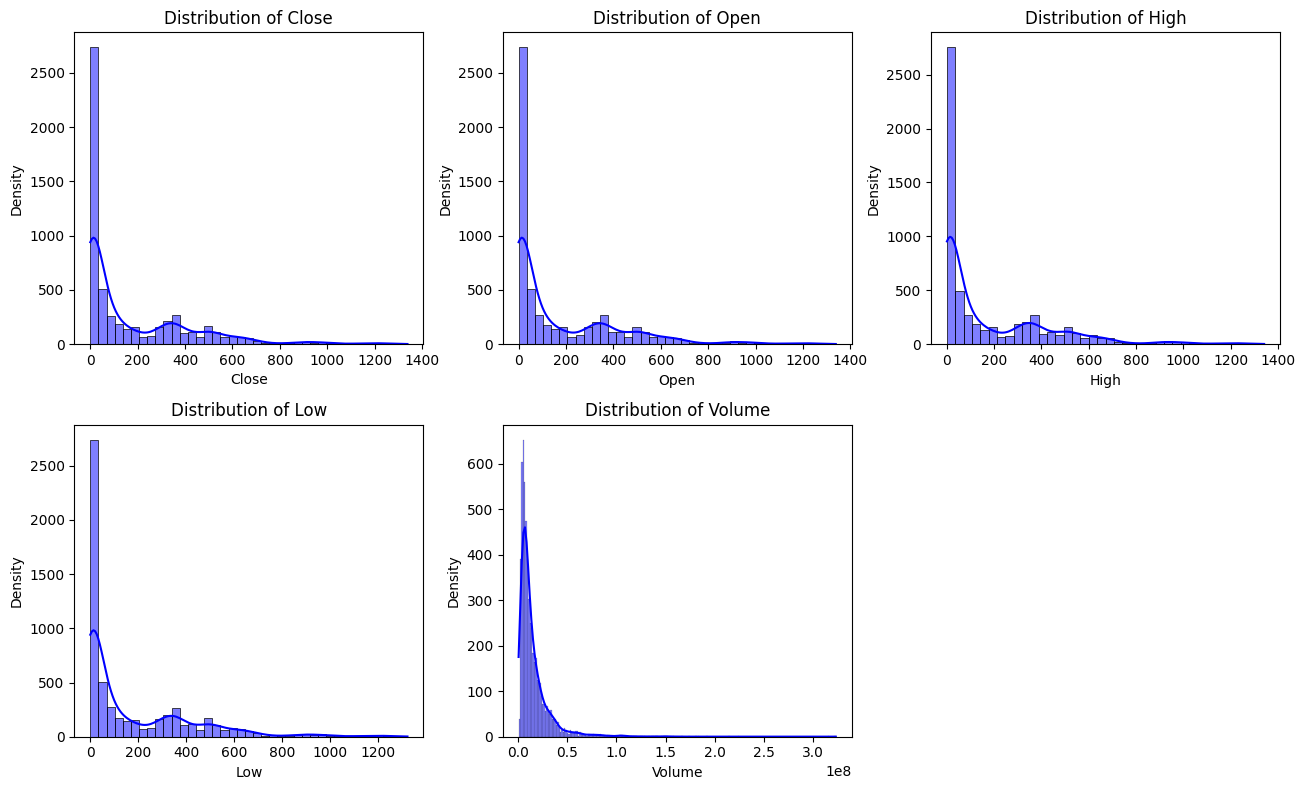

In [54]:
# Plot feature distribution
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13,8))
axes = axes.flatten() # Flatten the axes array for easy iteration
columns = ['Close','Open','High','Low','Volume'] # Use only the relevant columns

for i,col in enumerate(columns):
  sns.histplot(df[col], ax=axes[i], kde=True, color='b')
  axes[i].set_title(f'Distribution of {col}') # Add title to each subplot
  axes[i].set_xlabel(f'{col}')
  axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Bivariant Analysis

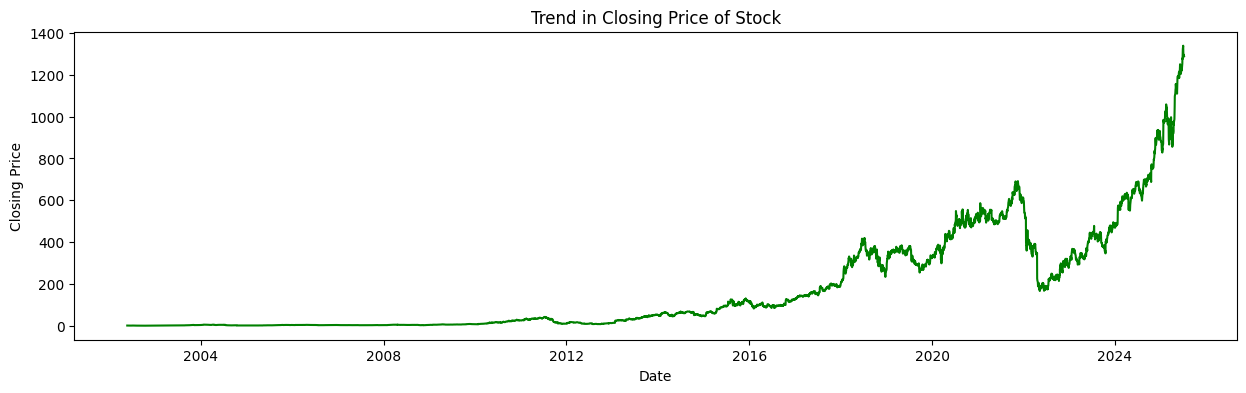

In [56]:
# Trend in Closing price of stock
plt.figure(figsize=(15, 4))
plt.plot(df['Date'], df['Close'], color='green')
plt.title('Trend in Closing Price of Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()